In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
data = pd.read_csv("dataset/normalized_data.csv")
data.head()


,eeg_1,eeg_2,eeg_3,eeg_4,eeg_5,eeg_6,eeg_7,eeg_8,eeg_9,eeg_10,...,eeg_243,eeg_244,eeg_245,eeg_246,eeg_247,eeg_248,eeg_249,eeg_250,score,normalized_form
0,0.7177,-0.2062,0.0475,1.0721,2.4135,3.5125,3.7577,2.7633,0.7151,-1.5270,...,9.8659,6.0245,-0.3442,-6.7022,-10.5920,-10.7050,-7.2834,-1.8025,9,0.905440
1,-20.2720,-15.5270,-7.3470,1.1873,7.7569,11.8050,14.1470,15.7500,16.7530,16.4740,...,-14.8110,-11.2060,-4.8725,1.8731,6.2072,6.1948,1.8273,-4.8429,7,0.723446
2,-2.5855,-3.6533,-3.1125,-1.5704,-0.2837,-0.3124,-1.8101,-3.9264,-5.3829,-5.3230,...,-0.1838,-3.6101,-8.3515,-12.8430,-15.1760,-14.1210,-9.8510,-3.9632,8,0.809585
3,3.1062,3.9020,4.1897,4.0014,3.4469,2.5849,1.4279,0.0445,-1.3564,-2.4403,...,14.7390,16.0430,16.1770,15.4330,14.1300,12.4790,10.6100,8.6729,8,0.813472
4,4.8654,4.2604,3.1231,1.7460,0.6860,0.5555,1.7299,4.1115,7.0969,9.7958,...,0.2532,0.0332,-1.3112,-3.5680,-5.8331,-6.8665,-5.7612,-2.5252,9,0.898316


In [4]:
# Split features and target
X = data.iloc[:, :-3].values  # EEG signals
y = data["normalized_form"].values  # Target

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
# Reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [6]:
# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/100
15/15 - 1s - loss: 0.0033 - val_loss: 0.0258 - 694ms/epoch - 46ms/step
Epoch 2/100
15/15 - 0s - loss: 0.0030 - val_loss: 0.0272 - 23ms/epoch - 2ms/step
Epoch 3/100
15/15 - 0s - loss: 0.0026 - val_loss: 0.0286 - 23ms/epoch - 2ms/step
Epoch 4/100
15/15 - 0s - loss: 0.0025 - val_loss: 0.0281 - 22ms/epoch - 1ms/step
Epoch 5/100
15/15 - 0s - loss: 0.0026 - val_loss: 0.0281 - 23ms/epoch - 2ms/step
Epoch 6/100
15/15 - 0s - loss: 0.0027 - val_loss: 0.0273 - 22ms/epoch - 1ms/step
Epoch 7/100
15/15 - 0s - loss: 0.0027 - val_loss: 0.0272 - 22ms/epoch - 1ms/step
Epoch 8/100
15/15 - 0s - loss: 0.0028 - val_loss: 0.0303 - 22ms/epoch - 1ms/step
Epoch 9/100
15/15 - 0s - loss: 0.0030 - val_loss: 0.0267 - 22ms/epoch - 1ms/step
Epoch 10/100
15/15 - 0s - loss: 0.0027 - val_loss: 0.0277 - 22ms/epoch - 1ms/step
Epoch 11/100
15/15 - 0s - loss: 0.0031 - val_loss: 0.0280 - 23ms/epoch - 2ms/step
Epoch 12/100
15/15 - 0s - loss: 0.0027 - val_loss: 0.0284 - 23ms/epoch - 2ms/step
Epoch 13/100
15/15 - 0s

In [16]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

4/4 [==============================] - 0s 846us/step


0.2630864344635481

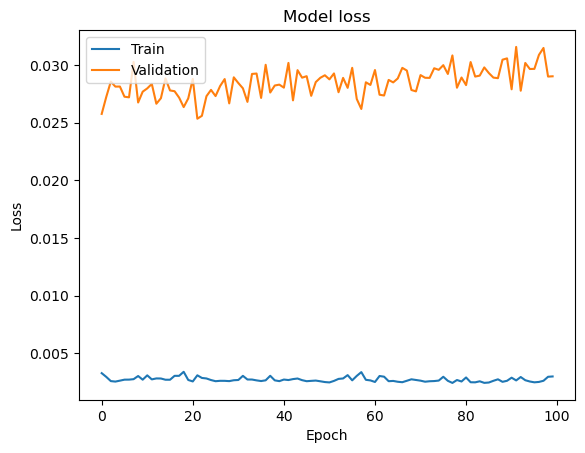

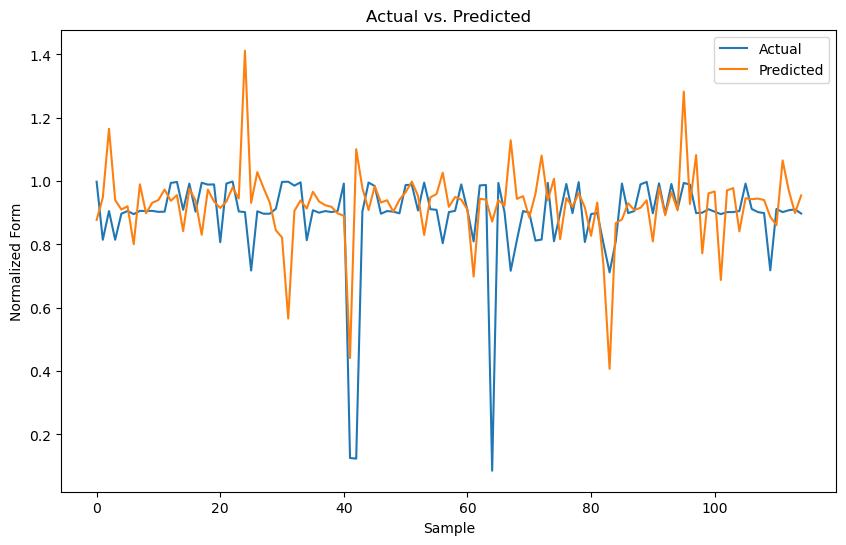

Mean Absolute Percentage Error (MAPE): 0.2630864344635481


In [17]:
# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted')
plt.xlabel('Sample')
plt.ylabel('Normalized Form')
plt.legend()
plt.show()

print("Mean Absolute Percentage Error (MAPE):", mape)

/Users/dolphinium/anaconda3/envs/env3.9/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 512 is greater than input length  = 249, using nperseg = 249
  warnings.warn('nperseg = {0:d} is greater than input length '


Epoch 1/100
15/15 - 1s - loss: 0.7655 - val_loss: 0.6869 - 662ms/epoch - 44ms/step
Epoch 2/100
15/15 - 0s - loss: 0.6298 - val_loss: 0.5482 - 23ms/epoch - 2ms/step
Epoch 3/100
15/15 - 0s - loss: 0.4837 - val_loss: 0.4004 - 23ms/epoch - 2ms/step
Epoch 4/100
15/15 - 0s - loss: 0.3353 - val_loss: 0.2615 - 23ms/epoch - 2ms/step
Epoch 5/100
15/15 - 0s - loss: 0.2082 - val_loss: 0.1541 - 53ms/epoch - 4ms/step
Epoch 6/100
15/15 - 0s - loss: 0.1194 - val_loss: 0.0916 - 34ms/epoch - 2ms/step
Epoch 7/100
15/15 - 0s - loss: 0.0716 - val_loss: 0.0610 - 23ms/epoch - 2ms/step
Epoch 8/100
15/15 - 0s - loss: 0.0477 - val_loss: 0.0468 - 22ms/epoch - 1ms/step
Epoch 9/100
15/15 - 0s - loss: 0.0346 - val_loss: 0.0383 - 23ms/epoch - 2ms/step
Epoch 10/100
15/15 - 0s - loss: 0.0260 - val_loss: 0.0318 - 22ms/epoch - 1ms/step
Epoch 11/100
15/15 - 0s - loss: 0.0202 - val_loss: 0.0276 - 22ms/epoch - 1ms/step
Epoch 12/100
15/15 - 0s - loss: 0.0164 - val_loss: 0.0248 - 24ms/epoch - 2ms/step
Epoch 13/100
15/15 - 0s

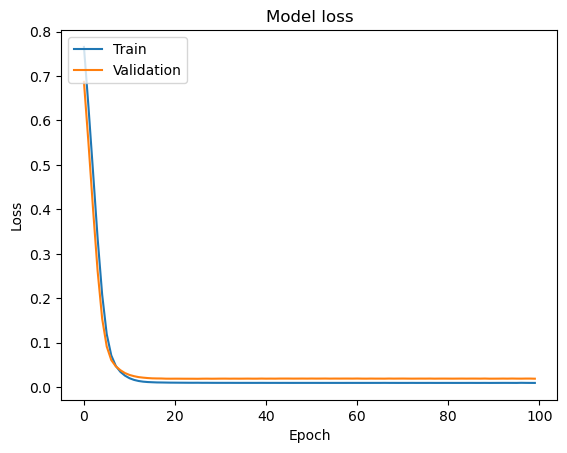

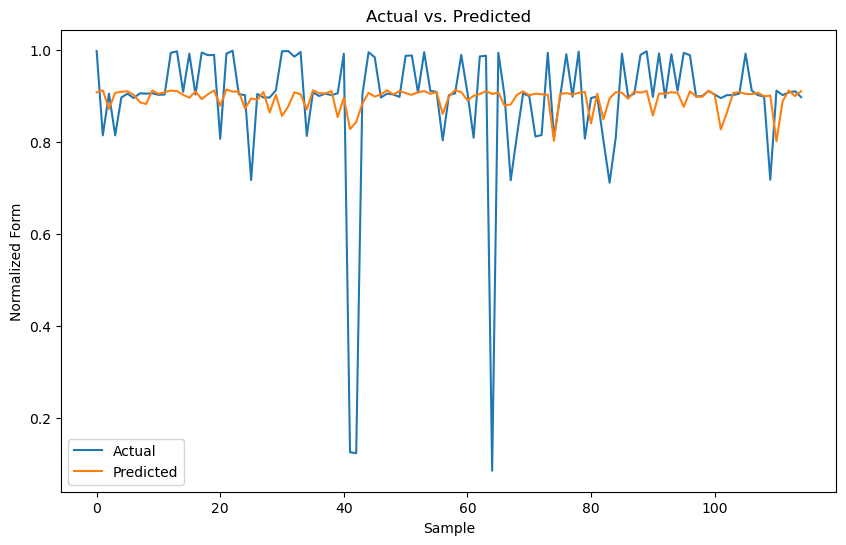

Mean Absolute Percentage Error (MAPE) for frequency bands: 0.23632458018795413


In [20]:
from scipy.signal import welch

# Define frequency bands
frequency_bands = {
    "delta": (0.5, 4),
    "theta": (4, 8),
    "alpha": (8, 12),
    "beta": (12, 30),
    "gamma": (30, 45)
}

# Function to extract frequency band features
def extract_band_features(eeg_signals):
    band_features = []
    for signal in eeg_signals:
        band_power = []
        for band_name, (low, high) in frequency_bands.items():
            f, Pxx = welch(signal, fs=250, nperseg=512)
            band_idx = np.where((f >= low) & (f < high))
            power_in_band = np.sum(Pxx[band_idx])
            band_power.append(power_in_band)
        band_features.append(band_power)
    return np.array(band_features)

# Extract frequency band features from EEG signals
X_band_features = extract_band_features(X)

# Normalize band features
scaler_band = MinMaxScaler()
X_band_features_scaled = scaler_band.fit_transform(X_band_features)

# Split the dataset into training and testing sets
X_train_band, X_test_band, y_train_band, y_test_band = train_test_split(X_band_features_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM
X_train_band = X_train_band.reshape((X_train_band.shape[0], 1, X_train_band.shape[1]))
X_test_band = X_test_band.reshape((X_test_band.shape[0], 1, X_test_band.shape[1]))

# Build LSTM model
model_band = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, input_shape=(X_train_band.shape[1], X_train_band.shape[2])),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_band.compile(optimizer='adam', loss='mse')

# Train the model
history_band = model_band.fit(X_train_band, y_train_band, epochs=100, batch_size=32, validation_data=(X_test_band, y_test_band), verbose=2)

# Make predictions
y_pred_band = model_band.predict(X_test_band)

# Calculate MAPE
mape_band = mean_absolute_percentage_error(y_test_band, y_pred_band)

# Plot training & validation loss
plt.plot(history_band.history['loss'])
plt.plot(history_band.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_band, label='Actual')
plt.plot(y_pred_band, label='Predicted')
plt.title('Actual vs. Predicted')
plt.xlabel('Sample')
plt.ylabel('Normalized Form')
plt.legend()
plt.show()

print("Mean Absolute Percentage Error (MAPE) for frequency bands:", mape_band)
